In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load

In [15]:
interpreter = tf.lite.Interpreter(model_path='lite-model_movenet_singlepose_lightning_3.tflite')

In [16]:
interpreter.allocate_tensors()

# Detection

In [17]:
#plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

NameError: name 'img' is not defined

In [ ]:
#img = frame.copy()

In [ ]:
#img.shape

In [18]:
interpreter.get_input_details()

[{'name': 'serving_default_input:0',
  'index': 0,
  'shape': array([  1, 192, 192,   3]),
  'shape_signature': array([  1, 192, 192,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [75]:
#Video capture
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #reshape
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)
    input_image = tf.cast(img, tf.float32)
    
    #input, output
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    #predict
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints= interpreter.get_tensor(output_details[0]['index'])
    print(keypoints)
    
    #render
    draw_edges(frame, keypoints, EDGES, 0.04)
    draw_keypoints(frame, keypoints, 0.04)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[[[0.7398032  0.15180549 0.04955278]
   [0.72101617 0.1568011  0.02750664]
   [0.672652   0.04996366 0.02482452]
   [0.01292907 0.7369821  0.0116603 ]
   [0.15486942 0.87645173 0.01155955]
   [0.26244408 0.6368358  0.00304561]
   [0.24451053 0.37614974 0.00319919]
   [0.42936665 0.6764507  0.00699302]
   [0.39001024 0.3445832  0.01594399]
   [0.5963553  0.6516011  0.00735539]
   [0.59224725 0.45050037 0.02265185]
   [0.5385728  0.6331267  0.06777924]
   [0.5414747  0.42901894 0.0954295 ]
   [0.65101683 0.6703273  0.01038361]
   [0.68192524 0.44830558 0.02076702]
   [0.7354564  0.60189295 0.00542958]
   [0.7308208  0.42454332 0.01786163]]]]
[[[[0.74021834 0.15096197 0.04722867]
   [0.721254   0.15624005 0.02681658]
   [0.70844525 0.13096102 0.02392299]
   [0.01253488 0.7381501  0.01190104]
   [0.15422209 0.87907404 0.0128918 ]
   [0.26167393 0.6370444  0.00330598]
   [0.24767141 0.35387218 0.00331089]
   [0.42855412 0.67716205 0.00697569]
   [0.39051002 0.3435765  0.01484264]
   [0.596

[[[[0.76006734 0.1640671  0.02974048]
   [0.75415564 0.17878585 0.01998226]
   [0.02888692 0.9798281  0.0218588 ]
   [0.81097806 0.41967136 0.02106426]
   [0.00448317 0.47508585 0.0127429 ]
   [0.77559966 0.33191806 0.03690426]
   [0.7877409  0.6554403  0.0363537 ]
   [0.10656338 0.09778669 0.0575779 ]
   [0.10749544 0.04044712 0.06492279]
   [0.46085116 0.6092231  0.00430031]
   [0.43582973 0.4509905  0.00846745]
   [0.6302497  0.5547153  0.05011534]
   [0.6067933  0.4202869  0.04937628]
   [0.737746   0.56065935 0.01082534]
   [0.71753395 0.39598092 0.01477701]
   [0.68289375 0.5128292  0.01106055]
   [0.6840757  0.4233006  0.01329919]]]]
[[[[0.76022863 0.16399164 0.03006424]
   [0.75425375 0.17873237 0.02008019]
   [0.02921871 0.9802259  0.02084503]
   [0.8110285  0.41966233 0.02120341]
   [0.00454999 0.47538516 0.01257235]
   [0.7756133  0.33195287 0.03699633]
   [0.787749   0.65536493 0.03640021]
   [0.10662647 0.09800152 0.05836257]
   [0.10754056 0.04005985 0.0657201 ]
   [0.460

[[[[ 0.557952    0.00177633  0.05676688]
   [ 0.5507875   0.00370092  0.04582927]
   [ 0.5489826  -0.01189292  0.04078756]
   [ 0.55058783  0.00156547  0.0429736 ]
   [ 0.4853081  -0.01578316  0.01928711]
   [ 0.46704873  0.00633826  0.04366751]
   [ 0.2381326   0.3556062   0.00948893]
   [ 0.46087015  0.7029388   0.00916491]
   [ 0.44722363  0.33438158  0.01750371]
   [ 0.6277399   0.67999065  0.01265923]
   [ 0.6389233   0.42637265  0.01742323]
   [ 0.6055095   0.60726804  0.03598204]
   [ 0.60390824  0.4176141   0.03179608]
   [ 0.7944243   0.5670542   0.01787184]
   [ 0.7999679   0.4322195   0.01773632]
   [ 0.86635983  0.5748358   0.01508144]
   [ 0.86558455  0.47135127  0.02300294]]]]
[[[[ 0.557952    0.00177633  0.05676688]
   [ 0.5507875   0.00370092  0.04582927]
   [ 0.5489826  -0.01189292  0.04078756]
   [ 0.55058783  0.00156547  0.0429736 ]
   [ 0.4853081  -0.01578316  0.01928711]
   [ 0.46704873  0.00633826  0.04366751]
   [ 0.2381326   0.3556062   0.00948893]
   [ 0.460870

[[[[ 0.57384765  0.0021818   0.05681421]
   [ 0.56654847  0.00387501  0.05125634]
   [ 0.5484648  -0.00902898  0.05135461]
   [ 0.5465992   0.00382385  0.05406991]
   [ 0.54493266 -0.01410212  0.03394384]
   [ 0.61688817  0.00506245  0.06497311]
   [ 0.18252864  0.35742578  0.00528979]
   [ 0.4671404   0.7216453   0.00705081]
   [ 0.44695085  0.3370129   0.02276925]
   [ 0.6331415   0.68112123  0.01396877]
   [ 0.64291453  0.42289722  0.01971113]
   [ 0.60354567  0.608027    0.03292436]
   [ 0.60692096  0.39673135  0.03276711]
   [ 0.79628885  0.5665508   0.01551426]
   [ 0.8238783   0.42826974  0.01779177]
   [ 0.8626058   0.573864    0.01476757]
   [ 0.88004965  0.47449142  0.01769979]]]]
[[[[ 0.57384765  0.0021818   0.05681421]
   [ 0.56654847  0.00387501  0.05125634]
   [ 0.5484648  -0.00902898  0.05135461]
   [ 0.5465992   0.00382385  0.05406991]
   [ 0.54493266 -0.01410212  0.03394384]
   [ 0.61688817  0.00506245  0.06497311]
   [ 0.18252864  0.35742578  0.00528979]
   [ 0.467140

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.49695677 0.5440946  0.03444606]
   [0.47897762 0.4900034  0.07744145]
   [0.5139859  0.577922   0.05868847]
   [0.51201993 0.48978493 0.07624585]
   [0.5637797  0.5689722  0.03223693]
   [0.55577886 0.50213873 0.02793879]
   [0.76361674 0.51849616 0.01040296]
   [0.7657322  0.46652877 0.01384589]]]]
[[[[0.46059057 0.4464172  0.05615845]
   [0.46864522 0.44910082 0.04972325]
   [0.47262174 0.44578326 0.045336  ]
   [0.3595888  0.49882776 0.01573187]
   [0.36222738 0.4156217  0.0150108 ]
   [0.42470676 0.54394805 0.02659401]
   [0.39930877 0.39886308 0.03301539]
   [0.46894783 0.5864682  0.02761203]
   [0.4514428  0.42764267 0.03032132]
   [0.496

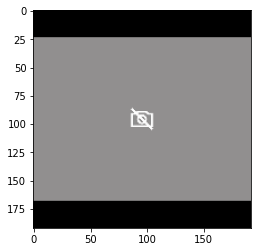

In [37]:
plt.imshow(tf.cast(np.squeeze(img), dtype= tf.int32))

In [25]:
img = frame.copy()

In [28]:
img.shape

(480, 640, 3)

In [29]:
np.expand_dims(img, axis=0).shape

(1, 480, 640, 3)

In [30]:
img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192, 192)

In [49]:
right_eye = keypoints[0][0][2]
left_elbow =  keypoints[0][0][7]

In [54]:
np.array(left_elbow[:2]*[480,640]). astype(int)

array([225, 375])

In [68]:
shaped_keypoints = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480, 640, 1]))

In [58]:
frame.shape

(480, 640, 3)

# Draw

In [62]:
def draw_keypoints(frame, keypoints, confidence):
    y, x, _ = frame.shape
    shaped_keypoints = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for shaped_keypoint in shaped_keypoints:
        x_keypoint, y_keypoint, keypoint_trust = shaped_keypoint
        if keypoint_trust > confidence:
            cv2.circle(frame, (int(x_keypoint), int(y_keypoint)), 4, (0,255,0), -1)
    

# Edges

In [65]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [72]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped_keypoints[p1]
    y2, x2, c2 = shaped_keypoints[p2]
    print((int(y1), int(x1)), (int(y2), int(x2)))

(221, 285) (224, 287)
(221, 285) (226, 285)
(224, 287) (172, 319)
(226, 285) (173, 265)
(221, 285) (203, 348)
(221, 285) (191, 255)
(203, 348) (225, 375)
(225, 375) (238, 348)
(191, 255) (216, 273)
(216, 273) (229, 313)
(203, 348) (191, 255)
(203, 348) (246, 369)
(191, 255) (245, 313)
(246, 369) (245, 313)
(246, 369) (270, 364)
(270, 364) (366, 331)
(245, 313) (266, 321)
(266, 321) (367, 298)


In [74]:
def draw_edges(frame, keypoints, edges, treshold):
    y, x, _ = frame.shape
    shaped_keypoints = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped_keypoints[p1]
        y2, x2, c2 = shaped_keypoints[p2]
        
        if (c1 > treshold) and (c2 > treshold):
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
